# 下載鐵達尼號旅客資料集

In [1]:
import urllib.request
import os

In [2]:
url="http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"
filepath="titanic3.xls"
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('downloaded:',result)

downloaded: ('titanic3.xls', <http.client.HTTPMessage object at 0x04A20990>)


# 使用Pandas dataframe讀取資料並進行處理

In [3]:
import numpy
import pandas as pd

In [20]:
all_df = pd.read_excel(os.path.abspath(filepath))

In [21]:
all_df[:2]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


#### survived是label標籤欄位，也就是我們要預測的目標，其餘都是特徵欄位
| 欄位 | 欄位說明 | 資料說明 |
|----|---|---|
| pclass | 艙等 |  1 = 頭等艙，2 = 商務艙，3 = 經濟艙 |
| survival  | 是否生存? | 0 = 否，1 = 是 |
| name  | 姓名 | |
| sex  | 性別 | female：女性，male：男性 |
| age  | 年齡 | |
| sibsp  | 手足、配偶也在船上數量 | |
| parch  |  雙親或子女也在船上數量 | |
| ticket  | 車票號碼 | |
| fare  | 旅客費用 | |
| cabin  | 艙位號碼 | |
| embarked  | 登船港口 |  C = Cherbourg，Q = Queenstown，S = Southampton |
| boat  | 救生艇編號 | 如果有存活 |
| body  | 人體編號 | 如果遇難和屍體被找到
| home.dest  | 出發地到目的地 | |

In [22]:
# 以上欄位中，ticket車票號碼、cabin艙位號碼，我們認為與要預測的結果survival(是否生存?)關聯不大，所以忽略
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp',
      'parch', 'fare', 'embarked']
all_df=all_df[cols]

In [23]:
all_df.isnull().sum()

survived      0
name          0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

| 欄位 | 處理方式 | 
|----|---|
| name | 姓名欄位後續在預測階段會使用，但是訓練不需要，必須先移除 |
| age  | 有幾筆age欄位是null，所以必須將null值改為平均值 |
| fare  | 有幾筆fare欄位是null，所以必須將null值改為平均值 |
| sex  | sex性別欄位是文字，我們必須轉換為0與1 |
| embarked  | 分類特徵欄位有3個分類C、Q、S，必須使用Onehot encoding轉換 |

In [24]:
# 將name欄位移除
df=all_df.drop(['name'], axis=1)

In [25]:
# age欄位null的資料填上平均值
age_median = df['age'].median()
df['age'] = df['age'].fillna(age_median)

In [26]:
# fare欄位null的資料填上平均值
fare_median = df['fare'].median()
df['fare'] = df['fare'].fillna(fare_median)

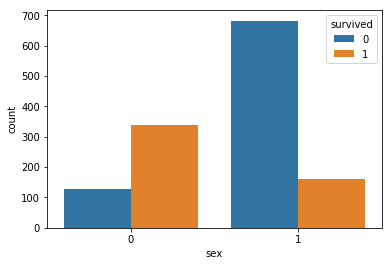

In [27]:
sns.countplot(x_OneHot_df['sex'], hue=x_OneHot_df['survived'])

In [28]:
# 轉換性別欄位為0與1
df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)

In [29]:
# 將embarked欄位以Onehot encoding轉換
x_OneHot_df = pd.get_dummies(data=df,columns=["embarked" ])

In [30]:
x_OneHot_df[:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,1,0.9167,1,2,151.5500,0,0,1


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
x_OneHot_df['family'] = x_OneHot_df['sibsp'] + x_OneHot_df['parch']

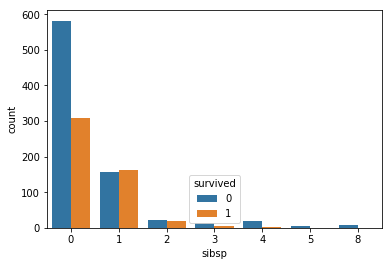

In [33]:
sns.countplot(x_OneHot_df['sibsp'], hue=x_OneHot_df['survived'])

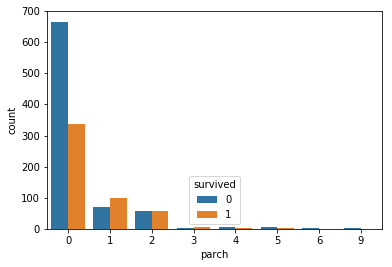

In [18]:
sns.countplot(x_OneHot_df['parch'], hue=x_OneHot_df['survived'])

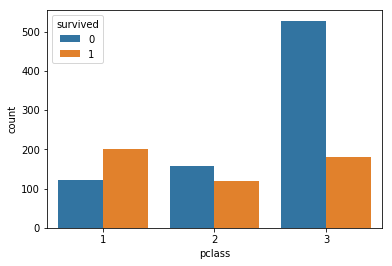

In [34]:
sns.countplot(x_OneHot_df['pclass'], hue=x_OneHot_df['survived'])

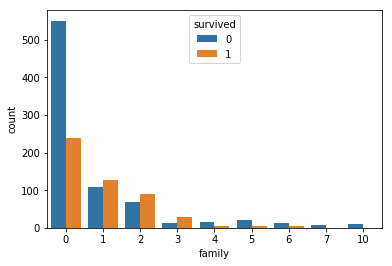

In [35]:
sns.countplot(x_OneHot_df['family'], hue=x_OneHot_df['survived'])

In [42]:
a = x_OneHot_df[x_OneHot_df['pclass'] == 1]
a

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,family
0,1,1,0,29.0000,0,0,211.3375,0,0,1,0
1,1,1,1,0.9167,1,2,151.5500,0,0,1,3
2,0,1,0,2.0000,1,2,151.5500,0,0,1,3
3,0,1,1,30.0000,1,2,151.5500,0,0,1,3
4,0,1,0,25.0000,1,2,151.5500,0,0,1,3
5,1,1,1,48.0000,0,0,26.5500,0,0,1,0
6,1,1,0,63.0000,1,0,77.9583,0,0,1,1
7,0,1,1,39.0000,0,0,0.0000,0,0,1,0
8,1,1,0,53.0000,2,0,51.4792,0,0,1,2
9,0,1,1,71.0000,0,0,49.5042,1,0,0,0


# 轉換為array

In [35]:
# 由於後續要進行深度學習訓練，所以必須將dataframe轉換為array
ndarray = x_OneHot_df.values

In [36]:
ndarray.shape

(1309, 10)

In [38]:
# 第0個欄位是label，之後的欄位是features
ndarray[:2]

array([[  1.    ,   1.    ,   0.    ,  29.    ,   0.    ,   0.    ,
        211.3375,   0.    ,   0.    ,   1.    ],
       [  1.    ,   1.    ,   1.    ,   0.9167,   1.    ,   2.    ,
        151.55  ,   0.    ,   0.    ,   1.    ]])

In [39]:
# 擷取features與label
Label = ndarray[:,0]
Features = ndarray[:,1:]

In [40]:
Features.shape

(1309, 9)

In [41]:
Features[:2]

array([[  1.    ,   0.    ,  29.    ,   0.    ,   0.    , 211.3375,
          0.    ,   0.    ,   1.    ],
       [  1.    ,   1.    ,   0.9167,   1.    ,   2.    , 151.55  ,
          0.    ,   0.    ,   1.    ]])

In [42]:
Label.shape

(1309,)

In [43]:
Label[:2]

array([1., 1.])

# 將array進行標準化

In [44]:
from sklearn import preprocessing

In [45]:
# 建立MinMaxScaler標準化刻度
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [47]:
#將feature標準化至0~1之間
scaledFeatures=minmax_scale.fit_transform(Features)

In [48]:
scaledFeatures[:2]

array([[0.        , 0.        , 0.36116884, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.00939458, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

# 將資料分為訓練資料與測試資料

In [54]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [55]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1055 test: 254


In [56]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [57]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [58]:
train_Features[:2]

array([[0.        , 0.        , 0.0229641 , 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.37369494, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

In [59]:
train_Label[:2]

array([0., 0.])

#  Create Model 

In [60]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [61]:
model = Sequential()

In [62]:
model.add(Dense(units=40, input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))

In [63]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [64]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

#  Train model

In [65]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [67]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 949 samples, validate on 106 samples
Epoch 1/30
 - 0s - loss: 0.6872 - accuracy: 0.5975 - val_loss: 0.6574 - val_accuracy: 0.8113
Epoch 2/30
 - 0s - loss: 0.6521 - accuracy: 0.6048 - val_loss: 0.5371 - val_accuracy: 0.8113
Epoch 3/30
 - 0s - loss: 0.5873 - accuracy: 0.6955 - val_loss: 0.4809 - val_accuracy: 0.8208
Epoch 4/30
 - 0s - loss: 0.5267 - accuracy: 0.7756 - val_loss: 0.4706 - val_accuracy: 0.7736
Epoch 5/30
 - 0s - loss: 0.4984 - accuracy: 0.7756 - val_loss: 0.4763 - val_accuracy: 0.7736
Epoch 6/30
 - 0s - loss: 0.4883 - accuracy: 0.7745 - val_loss: 0.4863 - val_accuracy: 0.7736
Epoch 7/30
 - 0s - loss: 0.4839 - accuracy: 0.7798 - val_loss: 0.4748 - val_accuracy: 0.7736
Epoch 8/30
 - 0s - loss: 0.4796 - accuracy: 0.7756 - val_loss: 0.4559 - val_accuracy: 0.7736
Epoch 9/30
 - 0s - loss: 0.4746 - accuracy: 0.7787 - val_loss: 0.4598 - val_accuracy: 0.7736
Epoch 10/30
 - 0s - loss: 0.4727 - accuracy: 0.7734 - val_loss: 0.4393 - val_accuracy: 0.8208
Epoch 11/30
 - 0s - los

#  Print History

In [68]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

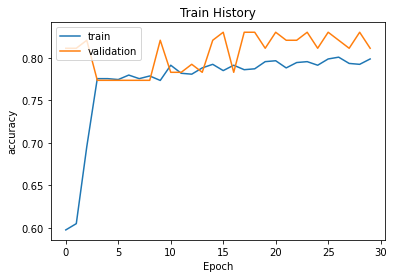

In [70]:
show_train_history(train_history,'accuracy','val_accuracy')

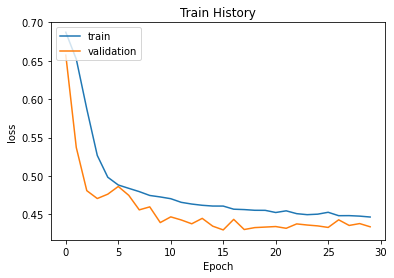

In [71]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [72]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

254/254 [==============================] - 0s 24us/step


In [73]:
scores[1]

0.7952755689620972

# 預測資料

# 加入Jack & Rose資料

## 在鐵達尼號電影中，Jack跟Rose是虛擬人物，我們希望能用我們所訓練完成的模型來預測男女主角的生存機率，以下資料是我們根據電影劇情所猜想的

In [74]:
Jack = pd.Series([0 ,'Jack',3, 'male'  , 23, 1, 0,  5.0000,'S'])
Rose = pd.Series([1 ,'Rose',1, 'female', 20, 1, 0, 100.0000,'S'])

In [75]:
JR_df = pd.DataFrame([list(Jack),list(Rose)],  
                  columns=['survived', 'name','pclass', 'sex', 
                   'age', 'sibsp','parch', 'fare','embarked'])

In [76]:
all_df=pd.concat([all_df,JR_df])

In [77]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


# 進行預測

In [78]:
all_Features,Label=PreprocessData(all_df)

In [79]:
all_probability=model.predict(all_Features)

In [80]:
all_probability[:10]

array([[0.9725812 ],
       [0.5870869 ],
       [0.98399884],
       [0.34284383],
       [0.97669595],
       [0.24007711],
       [0.9144444 ],
       [0.2996142 ],
       [0.9317223 ],
       [0.2202505 ]], dtype=float32)

In [81]:
pd=all_df
pd.insert(len(all_df.columns),
          'probability',all_probability)

# 預測Jack & Rose資料的生存機率

In [82]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.134924
1,1,Rose,1,female,20.0,1,0,100.0,S,0.975473


# 查看生存機率高，卻沒有存活

In [83]:
pd[(pd['survived']==0) &  (pd['probability']>0.9) ]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.983999
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.976696
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.980960
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.975514
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.902714


In [84]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.972581
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.587087
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.983999
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.342844
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.976696


## 在真實沉船中全家幾乎死去的Allison family的故事。他們全家，包括兩名幼兒及一名護士（Alice Cleaver）乘坐郵輪返回加拿大蒙特利爾。當Taianic撞冰山下沉時，該名護士大感恐懼，帶同Allison的一名嬰兒Trevor上救生艇，把其他家庭成員留在船上。 Allison全家不斷尋找該名嬰兒，最後賠上所有人的性命。

## 當時50歲的女乘客安伊莉莎白伊沙姆（Ann Elizabeth Isham)，住在巴黎要搭船返回美國，帶著她的愛狗搭乘鐵達尼號。於是將自己的大丹狗安置在船上的狗舍中，每天都去探望牠。船難發生時，她問船員能否帶著愛犬一起走，但船員說，這隻狗太大了，會佔用其他乘客的位置，因此拒絕。伊沙姆作出一個令人震驚的決定，她不願獨活，毅然離開救生艇，跑回船艙，尋找愛犬。幾天後，救難船「麥凱-貝內特號」上的船員發現海面上漂浮著一具女屍，懷中還緊緊抱著一隻大狗。救援人員認為，這應該就是伊沙姆和她的愛犬。

## 67歲富商Isidor Straus和63歲妻子Ida Straus當年他們帶著兩名僕人登上了鐵達尼號。Isidor是美國梅西百貨的創辦人，還曾參選過州議員，是世界第二巨富。當時準備從歐洲回到美國的家，然而Taianic撞上冰山即將沉沒時，Ida作為頭等艙的女乘客，很快獲得救生艇上的一席。Isidor身分特別，也可以登船，但他放棄了活下去的機會，說：「除非我看到所有的女人跟孩子都上了救生艇，否則我是絕對不會先走的。」Ida知道丈夫的決定後，返回已開始下沉的輪船陪伴丈夫：「我跟你一起生活了40年，一起養育了6個可愛的兒女，不論你在哪，我就去哪(Where you go, I go)。」最終這對夫妻在甲板上緊緊相擁，看著救生艇載著驚慌的乘客們離開。後來人們在海上找到了Isidor的遺體，Ida則沉沒在冰冷的海底。

